### С целью совпадения ответов с грейдером Coursera используются следующие версии:
 - <b>python==2.7</b>
 - <b>gensim==2.3.0</b>


# Programming Assignment: 
## Готовим LDA по рецептам

Как вы уже знаете, в тематическом моделировании делается предположение о том, что для определения тематики порядок слов в документе не важен; об этом гласит гипотеза «мешка слов». Сегодня мы будем работать с несколько нестандартной для тематического моделирования коллекцией, которую можно назвать «мешком ингредиентов», потому что на состоит из рецептов блюд разных кухонь. Тематические модели ищут слова, которые часто вместе встречаются в документах, и составляют из них темы. Мы попробуем применить эту идею к рецептам и найти кулинарные «темы». Эта коллекция хороша тем, что не требует предобработки. Кроме того, эта задача достаточно наглядно иллюстрирует принцип работы тематических моделей.

Для выполнения заданий, помимо часто используемых в курсе библиотек, потребуются модули *json* и *gensim*. Первый входит в дистрибутив Anaconda, второй можно поставить командой 

*pip install gensim*

Построение модели занимает некоторое время. На ноутбуке с процессором Intel Core i7 и тактовой частотой 2400 МГц на построение одной модели уходит менее 10 минут.

### Загрузка данных

Коллекция дана в json-формате: для каждого рецепта известны его id, кухня (cuisine) и список ингредиентов, в него входящих. Загрузить данные можно с помощью модуля json (он входит в дистрибутив Anaconda):

In [1]:
import json

import warnings
warnings.filterwarnings('ignore')

In [2]:
with open('recipes.json') as f:
    recipes = json.load(f)

In [3]:
print(recipes[0])

{u'cuisine': u'greek', u'id': 10259, u'ingredients': [u'romaine lettuce', u'black olives', u'grape tomatoes', u'garlic', u'pepper', u'purple onion', u'seasoning', u'garbanzo beans', u'feta cheese crumbles']}


### Составление корпуса

In [4]:
from gensim import corpora, models
import numpy as np

No handlers could be found for logger "gensim.models.doc2vec"


Наша коллекция небольшая, и целиком помещается в оперативную память. Gensim может работать с такими данными и не требует их сохранения на диск в специальном формате. Для этого коллекция должна быть представлена в виде списка списков, каждый внутренний список соответствует отдельному документу и состоит из его слов. Пример коллекции из двух документов: 

[["hello", "world"], ["programming", "in", "python"]]

Преобразуем наши данные в такой формат, а затем создадим объекты corpus и dictionary, с которыми будет работать модель.

In [5]:
documents = [recipe['ingredients'] for recipe in recipes]
dictionary = corpora.Dictionary(documents)   # составляем словарь
# составляем корпус документов
corpus = [dictionary.doc2bow(text) for text in documents]

In [6]:
print(documents[0])
print(corpus[0])

[u'romaine lettuce', u'black olives', u'grape tomatoes', u'garlic', u'pepper', u'purple onion', u'seasoning', u'garbanzo beans', u'feta cheese crumbles']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


У объекта dictionary есть полезная переменная dictionary.token2id, позволяющая находить соответствие между ингредиентами и их индексами.

### Обучение модели
Вам может понадобиться [документация](https://radimrehurek.com/gensim/models/ldamodel.html) LDA в gensim.

__Задание 1.__ Обучите модель LDA с 40 темами, установив количество проходов по коллекции 5 и оставив остальные параметры по умолчанию. 


Затем вызовите метод модели *show_topics*, указав количество тем 40 и количество токенов 10, и сохраните результат (топы ингредиентов в темах) в отдельную переменную. Если при вызове метода *show_topics* указать параметр *formatted=True*, то топы ингредиентов будет удобно выводить на печать, если *formatted=False*, будет удобно работать со списком программно. Выведите топы на печать, рассмотрите темы, а затем ответьте на вопрос:

Сколько раз ингредиенты "salt", "sugar", "water", "mushrooms", "chicken", "eggs" встретились среди топов-10 всех 40 тем? При ответе __не нужно__ учитывать составные ингредиенты, например, "hot water".

Передайте 6 чисел в функцию save_answers1 и загрузите сгенерированный файл в форму.

У gensim нет возможности фиксировать случайное приближение через параметры метода, но библиотека использует numpy для инициализации матриц. Поэтому, по утверждению автора библиотеки, фиксировать случайное приближение нужно командой, которая написана в следующей ячейке. __Перед строкой кода с построением модели обязательно вставляйте указанную строку фиксации random.seed.__

In [7]:
%%time

np.random.seed(76543)

ldamodel = models.ldamodel.LdaModel(
    corpus, num_topics=40, passes=5, id2word=dictionary)

ldamodel.save('ldamodel_cuisine')

CPU times: user 1min 20s, sys: 12.8 ms, total: 1min 20s
Wall time: 1min 20s


In [8]:
ldamodel.show_topics(num_topics=40, num_words=10, formatted=True)

[(0,
  u'0.089*"cooking spray" + 0.083*"salt" + 0.080*"garlic cloves" + 0.068*"olive oil" + 0.066*"chopped onion" + 0.037*"crushed red pepper" + 0.036*"fat free less sodium chicken broth" + 0.034*"black pepper" + 0.032*"ground black pepper" + 0.032*"water"'),
 (1,
  u'0.085*"carrots" + 0.059*"onions" + 0.057*"sauce" + 0.056*"cabbage" + 0.046*"spinach" + 0.039*"beef" + 0.033*"low sodium chicken broth" + 0.033*"water" + 0.029*"firm tofu" + 0.028*"green cabbage"'),
 (2,
  u'0.066*"cracked black pepper" + 0.059*"dry red wine" + 0.041*"shortening" + 0.041*"beef broth" + 0.040*"vegetable oil cooking spray" + 0.039*"grape tomatoes" + 0.035*"cilantro sprigs" + 0.031*"french bread" + 0.029*"dried rosemary" + 0.029*"all-purpose flour"'),
 (3,
  u'0.133*"potatoes" + 0.124*"oil" + 0.063*"salt" + 0.059*"chickpeas" + 0.042*"onions" + 0.038*"coriander" + 0.034*"pepper" + 0.033*"saffron" + 0.031*"chopped tomatoes" + 0.026*"vegetables"'),
 (4,
  u'0.062*"green bell pepper" + 0.058*"garlic powder" + 0.0

In [9]:
topics = ldamodel.show_topics(num_topics=40, num_words=10, formatted=False)

salt, sugar, water, mushrooms, chicken, eggs = 0, 0, 0, 0, 0, 0

for theme in topics:
    for words in theme:
        if type(words) == list:
            for word in words:
                ingridient = word[0]

                if ingridient == 'salt':
                    salt += 1
                elif ingridient == 'sugar':
                    sugar += 1
                elif ingridient == 'water':
                    water += 1
                elif ingridient == 'mushrooms':
                    mushrooms += 1
                elif ingridient == 'chicken':
                    chicken += 1
                elif ingridient == 'eggs':
                    eggs += 1

print('salt:', salt, 'sugar:', sugar, 'water:', water,
      'mushrooms:', mushrooms, 'chicken:', chicken, 'eggs:', eggs)

('salt:', 20, 'sugar:', 7, 'water:', 8, 'mushrooms:', 1, 'chicken:', 1, 'eggs:', 1)


In [10]:
def save_answer1(salt, sugar, water, mushrooms, chicken, eggs):
    with open('submission_LDA_1.txt', 'w') as fout:
        fout.write(
            ' '.join([str(el) for el in [salt, sugar, water, mushrooms, chicken, eggs]]))
        fout.close()


save_answer1(salt, sugar, water, mushrooms, chicken, eggs)

### Фильтрация словаря
В топах тем гораздо чаще встречаются первые три рассмотренных ингредиента, чем последние три. При этом наличие в рецепте курицы, яиц и грибов яснее дает понять, что мы будем готовить, чем наличие соли, сахара и воды. Таким образом, даже в рецептах есть слова, часто встречающиеся в текстах и не несущие смысловой нагрузки, и поэтому их не желательно видеть в темах. Наиболее простой прием борьбы с такими фоновыми элементами — фильтрация словаря по частоте. Обычно словарь фильтруют с двух сторон: убирают очень редкие слова (в целях экономии памяти) и очень частые слова (в целях повышения интерпретируемости тем). Мы уберем только частые слова.

In [11]:
import copy
dictionary2 = copy.deepcopy(dictionary)

__Задание 2.__ У объекта dictionary2 есть переменная *dfs* — это словарь, ключами которого являются id токена, а элементами — число раз, сколько слово встретилось во всей коллекции. Сохраните в отдельный список ингредиенты, которые встретились в коллекции больше 4000 раз. Вызовите метод словаря *filter_tokens*, подав в качестве первого аргумента полученный список популярных ингредиентов. Вычислите две величины: dict_size_before и dict_size_after — размер словаря до и после фильтрации.

Затем, используя новый словарь, создайте новый корпус документов, corpus2, по аналогии с тем, как это сделано в начале ноутбука. Вычислите две величины: corpus_size_before и corpus_size_after — суммарное количество ингредиентов в корпусе (для каждого документа вычислите число различных ингредиентов в нем и просуммируйте по всем документам) до и после фильтрации.

Передайте величины dict_size_before, dict_size_after, corpus_size_before, corpus_size_after в функцию save_answers2 и загрузите сгенерированный файл в форму.

In [12]:
freq = dictionary2.dfs

large_freq = list(dict(filter(lambda word: word[1] > 4000, freq.items())).keys())
print(large_freq)

[0, 4, 9, 12, 45, 48, 17, 21, 54, 100, 29, 117]


In [13]:
dict_size_before = len(dictionary)
dictionary2.filter_tokens(large_freq)
dict_size_after = len(dictionary2)

print(dict_size_before, dict_size_after)

corpus2 = [dictionary2.doc2bow(text) for text in documents]

corpus_size_before = sum(len(x) for x in corpus)
corpus_size_after = sum(len(x) for x in corpus2)

print(corpus_size_before, corpus_size_after)

(6714, 6702)
(428249, 343665)


In [14]:
def save_answer2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after):
    with open('submission_LDA_2.txt', 'w') as fout:
        fout.write(' '.join([str(el) for el in [
                   dict_size_before, dict_size_after, corpus_size_before, corpus_size_after]]))
        fout.close()
        
save_answer2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after)

### Сравнение когерентностей
__Задание 3.__ Постройте еще одну модель по корпусу corpus2 и словарю dictionary2, остальные параметры оставьте такими же, как при первом построении модели. Сохраните новую модель в другую переменную (не перезаписывайте предыдущую модель). Не забудьте про фиксирование seed!

Затем воспользуйтесь методом *top_topics* модели, чтобы вычислить ее когерентность. Передайте в качестве аргумента соответствующий модели корпус. Метод вернет список кортежей (топ токенов, когерентность), отсортированных по убыванию последней. Вычислите среднюю по всем темам когерентность для каждой из двух моделей и передайте в функцию save_answers3. 

In [15]:
%%time

np.random.seed(76543)

ldamodel2 = models.ldamodel.LdaModel(
    corpus2, num_topics=40, passes=5, id2word=dictionary2)

ldamodel2.save('ldamodel2_cuisine')

CPU times: user 1min 5s, sys: 27 ms, total: 1min 5s
Wall time: 1min 6s


In [16]:
coherence_tuples = ldamodel.top_topics(corpus)
coherence2_tuples = ldamodel2.top_topics(corpus2)

In [17]:
coherence = np.mean([coh[1] for coh in coherence_tuples])
coherence2 = np.mean([coh[1] for coh in coherence2_tuples])

print(coherence, coherence2)

(-691.7755946261325, -752.9709754998805)


In [18]:
def save_answer3(coherence, coherence2):
    with open('submission_LDA_3.txt', 'w') as fout:
        fout.write(' '.join(['%3f' % el for el in [coherence, coherence2]]))
        fout.close()
        
save_answer3(coherence, coherence2)

Считается, что когерентность хорошо соотносится с человеческими оценками интерпретируемости тем. Поэтому на больших текстовых коллекциях когерентность обычно повышается, если убрать фоновую лексику. Однако в нашем случае этого не произошло. 

### Изучение влияния гиперпараметра alpha

В этом разделе мы будем работать со второй моделью, то есть той, которая построена по сокращенному корпусу. 

Пока что мы посмотрели только на матрицу темы-слова, теперь давайте посмотрим на матрицу темы-документы. Выведите темы для нулевого (или любого другого) документа из корпуса, воспользовавшись методом *get_document_topics* второй модели:

In [19]:
theme_0 = ldamodel2.get_document_topics(corpus2[0])
theme_0

[(4, 0.1281249999999999),
 (15, 0.3236846496255905),
 (22, 0.27665871617377874),
 (37, 0.1590316342006302)]

Также выведите содержимое переменной *.alpha* второй модели:

In [20]:
ldamodel2.alpha

array([0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025])

У вас должно получиться, что документ характеризуется небольшим числом тем. Попробуем поменять гиперпараметр alpha, задающий априорное распределение Дирихле для распределений тем в документах.

__Задание 4.__ Обучите третью модель: используйте сокращенный корпус (corpus2 и dictionary2) и установите параметр __alpha=1__, passes=5. Не забудьте про фиксацию seed! Выведите темы новой модели для нулевого документа; должно получиться, что распределение над множеством тем практически равномерное. Чтобы убедиться в том, что во второй модели документы описываются гораздо более разреженными распределениями, чем в третьей, посчитайте суммарное количество элементов, __превосходящих 0.01__, в матрицах темы-документы обеих моделей. Другими словами, запросите темы  модели для каждого документа с параметром *minimum_probability=0.01* и просуммируйте число элементов в получаемых массивах. Передайте две суммы (сначала для модели с alpha по умолчанию, затем для модели в alpha=1) в функцию save_answers4.

In [21]:
%%time

np.random.seed(76543)

ldamodel3 = models.ldamodel.LdaModel(
    corpus2, num_topics=40, passes=5, alpha=1, id2word=dictionary2)

ldamodel3.save('ldamodel3_cuisine')

CPU times: user 51.4 s, sys: 19.8 ms, total: 51.4 s
Wall time: 51.5 s


In [22]:
theme_0 = ldamodel3.get_document_topics(corpus2[0])
theme_0[:10]

[(0, 0.021286343792953504),
 (1, 0.02129859031009976),
 (2, 0.021320055508571793),
 (3, 0.021282109727077198),
 (4, 0.021276595744680847),
 (5, 0.02149660693371644),
 (6, 0.02129217677416888),
 (7, 0.042559706429162666),
 (8, 0.021276634057457264),
 (9, 0.021276595744680847)]

In [23]:
themes_lda_2 = ldamodel2.get_document_topics(corpus2, minimum_probability=0.01)
themes_lda_3 = ldamodel3.get_document_topics(corpus2, minimum_probability=0.01)

In [24]:
count_model2 = sum(len(x) for x in themes_lda_2)
count_model3 = sum(len(x) for x in themes_lda_3)

print(count_model2, count_model3)

(198898, 1590960)


In [25]:
def save_answer4(count_model2, count_model3):
    with open('submission_LDA_4.txt', 'w') as fout:
        fout.write(" ".join([str(el) for el in [count_model2, count_model3]]))
        fout.close()
        
save_answer4(count_model2, count_model3)

Таким образом, гиперпараметр __alpha__ влияет на разреженность распределений тем в документах. Аналогично гиперпараметр __eta__ влияет на разреженность распределений слов в темах.

### LDA как способ понижения размерности
Иногда, распределения над темами, найденные с помощью LDA, добавляют в матрицу объекты-признаки как дополнительные, семантические, признаки, и это может улучшить качество решения задачи. Для простоты давайте просто обучим классификатор рецептов на кухни на признаках, полученных из LDA, и измерим точность (accuracy).

__Задание 5.__ Используйте модель, построенную по сокращенной выборке с alpha по умолчанию (вторую модель). Составьте матрицу $\Theta = p(t|d)$ вероятностей тем в документах; вы можете использовать тот же метод get_document_topics, а также вектор правильных ответов y (в том же порядке, в котором рецепты идут в переменной recipes). Создайте объект RandomForestClassifier со 100 деревьями, с помощью функции cross_val_score вычислите среднюю accuracy по трем фолдам (перемешивать данные не нужно) и передайте в функцию save_answers5.

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [27]:
clf = RandomForestClassifier(n_estimators=100)

In [28]:
X = np.zeros((len(recipes), 40))

for i in range(len(recipes)):
    topics = ldamodel2.get_document_topics(corpus2[i])
    
    for topic in topics:
        index = topic[0]
        value = topic[1]
        
        X[i, index] = value

y = [recipe['cuisine'] for recipe in recipes]

In [29]:
accuracy = np.mean(cross_val_score(clf, X, y, cv=3))
print('Accuracy on 3 folds:', accuracy)

('Accuracy on 3 folds:', 0.5637366870879285)


In [30]:
def save_answer5(accuracy):
    with open('submission_LDA_5.txt', 'w') as fout:
        fout.write(str(accuracy))
        fout.close()
        
save_answer5(accuracy)

Для такого большого количества классов это неплохая точность. Вы можете попроовать обучать RandomForest на исходной матрице частот слов, имеющей значительно большую размерность, и увидеть, что accuracy увеличивается на 10–15%. Таким образом, LDA собрал не всю, но достаточно большую часть информации из выборки, в матрице низкого ранга.

### LDA — вероятностная модель
Матричное разложение, использующееся в LDA, интерпретируется как следующий процесс генерации документов.

Для документа $d$ длины $n_d$:
1. Из априорного распределения Дирихле с параметром alpha сгенерировать распределение над множеством тем: $\theta_d \sim Dirichlet(\alpha)$
1. Для каждого слова $w = 1, \dots, n_d$:
    1. Сгенерировать тему из дискретного распределения $t \sim \theta_{d}$
    1. Сгенерировать слово из дискретного распределения $w \sim \phi_{t}$.
    
Подробнее об этом в [Википедии](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation).

В контексте нашей задачи получается, что, используя данный генеративный процесс, можно создавать новые рецепты. Вы можете передать в функцию модель и число ингредиентов и сгенерировать рецепт :)

In [31]:
def generate_recipe(model, num_ingredients):
    theta = np.random.dirichlet(model.alpha)
    for i in range(num_ingredients):
        t = np.random.choice(np.arange(model.num_topics), p=theta)
        topic = model.show_topic(t, topn=model.num_terms)
        topic_distr = [x[1] for x in topic]
        terms = [x[0] for x in topic]
        w = np.random.choice(terms, p=topic_distr)
        print w

In [32]:
generate_recipe(ldamodel3, 10)

bean paste
chopped onion
lime juice
chopped green bell pepper
lime juice
black-eyed peas
dill tips
chili powder
bread crumb fresh
bacon


### Интерпретация построенной модели
Вы можете рассмотреть топы ингредиентов каждой темы. Большиснтво тем сами по себе похожи на рецепты; в некоторых собираются продукты одного вида, например, свежие фрукты или разные виды сыра.

Попробуем эмпирически соотнести наши темы с национальными кухнями (cuisine). Построим матрицу $A$ размера темы $x$ кухни, ее элементы $a_{tc}$ — суммы $p(t|d)$ по всем документам $d$, которые отнесены к кухне $c$. Нормируем матрицу на частоты рецептов по разным кухням, чтобы избежать дисбаланса между кухнями. Следующая функция получает на вход объект модели, объект корпуса и исходные данные и возвращает нормированную матрицу $A$. Ее удобно визуализировать с помощью seaborn.

In [33]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [34]:
def compute_topic_cuisine_matrix(model, corpus, recipes):
    # составляем вектор целевых признаков
    targets = list(set([recipe["cuisine"] for recipe in recipes]))
    # составляем матрицу
    tc_matrix = pd.DataFrame(data=np.zeros(
        (model.num_topics, len(targets))), columns=targets)
    for recipe, bow in zip(recipes, corpus):
        recipe_topic = model.get_document_topics(bow)
        for t, prob in recipe_topic:
            tc_matrix[recipe["cuisine"]][t] += prob
    # нормируем матрицу
    target_sums = pd.DataFrame(
        data=np.zeros((1, len(targets))), columns=targets)
    for recipe in recipes:
        target_sums[recipe["cuisine"]] += 1
    return pd.DataFrame(tc_matrix.values/target_sums.values, columns=tc_matrix.columns)

In [35]:
def plot_matrix(tc_matrix):
    plt.figure(figsize=(10, 10))
    sns.heatmap(tc_matrix, square=True)

CPU times: user 2min 39s, sys: 275 ms, total: 2min 39s
Wall time: 2min 40s


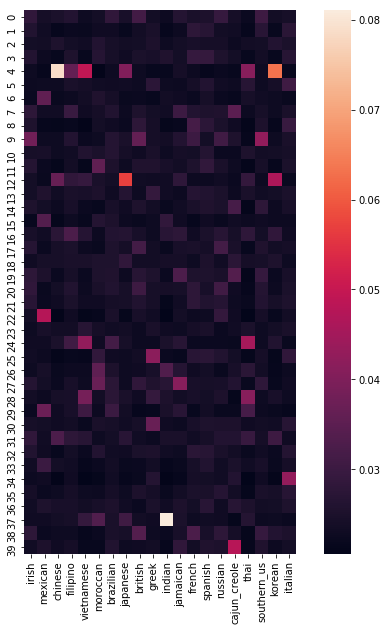

In [36]:
%%time

tc_matrix = compute_topic_cuisine_matrix(ldamodel3, corpus2, recipes)
plot_matrix(tc_matrix)

Чем темнее квадрат в матрице, тем больше связь этой темы с данной кухней. Мы видим, что у нас есть темы, которые связаны с несколькими кухнями. Такие темы показывают набор ингредиентов, которые популярны в кухнях нескольких народов, то есть указывают на схожесть кухонь этих народов. Некоторые темы распределены по всем кухням равномерно, они показывают наборы продуктов, которые часто используются в кулинарии всех стран. 

Жаль, что в датасете нет названий рецептов, иначе темы было бы проще интерпретировать...

### Заключение
В этом задании вы построили несколько моделей LDA, посмотрели, на что влияют гиперпараметры модели и как можно использовать построенную модель. 